# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Akhtar Jaffan Ramadhan
- **Email:** akhtar.ramadhan01@gmail.com
- **ID Dicoding:** jaffanramadhan

## Menentukan Pertanyaan Bisnis

- Dalam periode 2013 hingga 2017, bagaimana perkembangan tren PM2.5 di distrik Shunyi? Apakah terdapat pola musiman (seperti musim dingin atau musim panas) yang konsisten dalam tren peningkatan polusi?
- Sejauh mana parameter cuaca seperti suhu udara, tekanan atmosfer, dan kecepatan angin berpengaruh secara statistik terhadap tingkat konsentrasi PM2.5 di distrik Shunyi pada tahun 2013–2017?

## Import Semua Packages/Library yang Digunakan

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")



## Deskripsi Dataset

Dataset ini berisi data kualitas udara di wilayah Shunyi, Beijing dari Maret 2013 hingga Februari 2017.
Setiap baris mewakili pembacaan polutan dan parameter cuaca per jam. Kolom-kolom yang tersedia meliputi:

- **PM2.5**, **PM10**, **SO2**, **NO2**, **CO**, **O3**: konsentrasi polutan udara.
- **TEMP**, **PRES**, **DEWP**, **RAIN**, **WSPM**: parameter cuaca (suhu, tekanan, titik embun, curah hujan, kecepatan angin).
- **wd**: arah angin.
- **year**, **month**, **day**, **hour**: informasi waktu.
- **No**: ID unik baris.
- **station**: lokasi stasiun (semua adalah 'shunyi').

Tujuan dari analisis ini adalah untuk:
- Menentukan kapan tingkat polusi tertinggi terjadi.
- Menjelaskan bagaimana cuaca memengaruhi tingkat polusi.


## Data Wrangling

### Gathering Data

In [142]:
df = pd.read_csv("Data/PRSA_Data_Shunyi_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Insight:**
- Saya menggunakan data dari Shunyi, China. dataset ini mencakup periode 2013 hingga 2017, dataset ini diharapkan dapat membantu saya memahami kualitas udara dan tren polusi udara di wilayah urban.

- Dataset memiliki 18 kolom, 2 kolom kategorik dan 16 kolom numerik.

- Kolom dalam dataset meliputi:

    - `No` adalah ID unik baris.
    - `year`, `month`, `day`, `hour` merupakan informasi waktu.
    - `PM2.5`, `PM10`, `SO2`, `NO2`, `CO` yang merupakan onsentrasi polutan udara.
    - `O3` yang merupakan kadar oksigen.
    - `TEMP`, `PRES`, `DEWP`, `RAIN`, `WSPM` adalah parameter cuaca (suhu, tekanan, titik embun, curah hujan, kecepatan angin).
    - `wd`adalah  arah angin.
    - `WSPM` merupakan kecepatan angin.
    - `station` adalah lokasi stasiun di mana semuanya adalah Shunyi.

### Assessing Data

In [119]:
#Berapa baris dan kolom ?
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 35064
Jumlah kolom: 18


In [120]:
#Check Head
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [121]:
#Check Tail
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
35063,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [123]:
#Describe
df.describe().round(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.00,35064.00,35064.00,35064.00,35064.00,34151.00,34516.00,33768.00,33699.00,32886.00,33575.00,35013.00,35013.00,35010.00,35013.00,35020.00
mean,17532.50,2014.66,6.52,15.73,11.50,79.49,98.74,13.57,43.91,1187.06,55.20,13.39,1013.06,2.47,0.06,1.81
std,10122.25,1.18,3.45,8.80,6.92,81.23,89.14,19.57,31.00,1156.37,54.87,11.48,10.18,13.73,0.76,1.29
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,2.00,100.00,0.21,-16.80,988.00,-36.00,0.00,0.00
25%,8766.75,2014.00,4.00,8.00,5.75,19.00,31.00,2.00,19.00,400.00,10.00,3.00,1004.70,-8.80,0.00,1.00
50%,17532.50,2015.00,7.00,16.00,11.50,55.00,77.00,5.00,37.00,800.00,43.00,14.40,1012.70,3.10,0.00,1.50
75%,26298.25,2016.00,10.00,23.00,17.25,112.00,138.00,17.00,62.00,1500.00,77.00,23.20,1021.00,15.10,0.00,2.30
max,35064.00,2017.00,12.00,31.00,23.00,941.00,999.00,239.00,258.00,10000.00,351.72,40.60,1042.80,27.50,37.30,12.80


In [124]:
# Cek kolom missing values
print(f"Kolom Missing values: \n{df.isnull().sum()}")

Kolom Missing values: 
No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64


In [125]:
#Cek Data duplikat dan missing values keseluruhan
print(f"Jumlah Data Duplikat: {df.duplicated().sum()}")
print(f"Jumlah Missing values: {df.isnull().sum().sum()}")

Jumlah Data Duplikat: 0
Jumlah Missing values: 8523


In [126]:
#Cek Distribusi cakupan tahun
df['year'].value_counts().sort_index()

year
2013    7344
2014    8760
2015    8760
2016    8784
2017    1416
Name: count, dtype: int64

In [127]:
#Cek Dupes
df.duplicated().sum()

np.int64(0)

Check Outliers


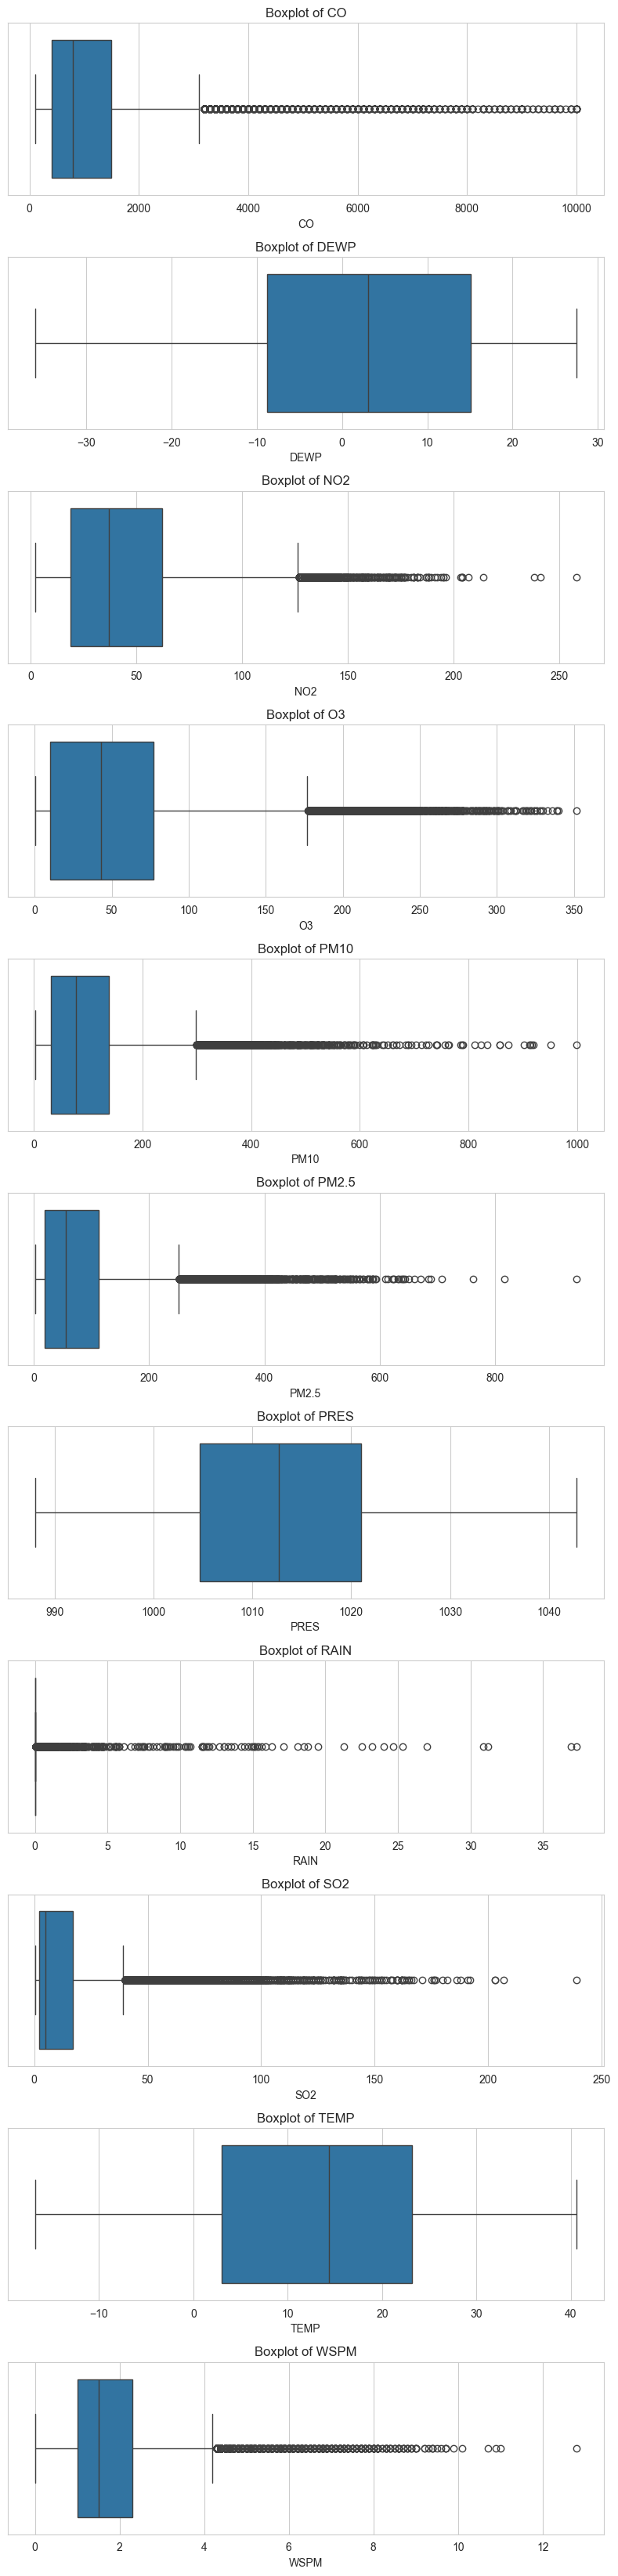

In [128]:
exclude_cols = ['No', 'year', 'month', 'day', 'hour']
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols)


# Hitung jumlah kolom numerik yang akan diproses
num_plots = len(numeric_cols)

# Buat figure dan axes
fig, axes = plt.subplots(num_plots, 1, figsize=(8, num_plots * 3))

# Buat satu boxplot per subplot
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


**Insight:**
- Data Berjumlah 35064 baris dan 18 Kolom. Dengan data type yang didominasi oleh float64 (11) yang disusul oleh int64 (5) lalu object (2)
- Walaupun data memiliki cukup banyak yang kosong,  duplikat menunjukan bahwa data tidak memiliki duplikat sama sekali
-Dari pengecekan isNull, dapat dilihat bahwa data CO merupakan data yang paling banyak null, disusul oleh O3, NO2, SO2, PM2.5, PM10, wd. diluar itu data null memiliki jumlah >=54. Distribusi null value bisa dilihat pada grafik.
- Pada distribusi cakupan tahun, 2017 memiliki data paling sedikit. perbedaan banyaknya data mungkin disebabkan karena proses pengumpulan data 2017 tidak berlangsung selama setahun penuh seperti tahun sebelumnya


### Cleaning Data

| Distrik   | Tipe Data              | Missing Value | Duplicate Data | Invalid Value | Outliers  |
|--------|------------------------|----------------|----------------|----------------|-----------|
| Shunyi| Year, Month, Day, Hour | 8523        | 0              | -              | 8 Kolom   |


Menyatukan kolom Year, Month, Day, dan Hour dalam sebuah kolom bernama datetime

In [129]:
df["datetime"] = pd.to_datetime(df[["year", "month", "day"]]) + pd.to_timedelta(df["hour"], unit="h")
col = "datetime"
df.insert(1, col, df.pop(col)) 
df.drop(["year", "month", "day", "hour"], axis=1, inplace=True)
df

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017-02-28 19:00:00,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017-02-28 20:00:00,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017-02-28 21:00:00,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017-02-28 22:00:00,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [130]:
# Mengatasi Missing values dengan berbagai metode

for col in df.columns:
        missing_count = df[col].isna().sum()
        
        if missing_count > 0:  
            
            if df[col].dtype in ['int64', 'float64']:  
                if df[col].skew() > 1 or df[col].skew() < -1:
                    df[col].interpolate(method="linear", limit_direction="forward", inplace=True)
                else:
                    df[col].fillna(df[col].median(), inplace=True) 
                    
            elif df[col].dtype == 'object': 
                df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_8076\2892306974.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].interpolate(method="linear", limit_direction="forward", inplace=True)
C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_8076\2892306974.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [131]:
print(f"Kolom Missing values: \n{df.isnull().sum()}")

Kolom Missing values: 
No          0
datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64


In [132]:
# Menghapus outlier

def iqr_trim(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.mask(series > upper_bound, upper_bound).mask(series < lower_bound, lower_bound)

# Terapkan trimming ke semua kolom numerik yang sudah kita seleksi sebelumnya
for col in numeric_cols:
    df[col] = iqr_trim(df[col])

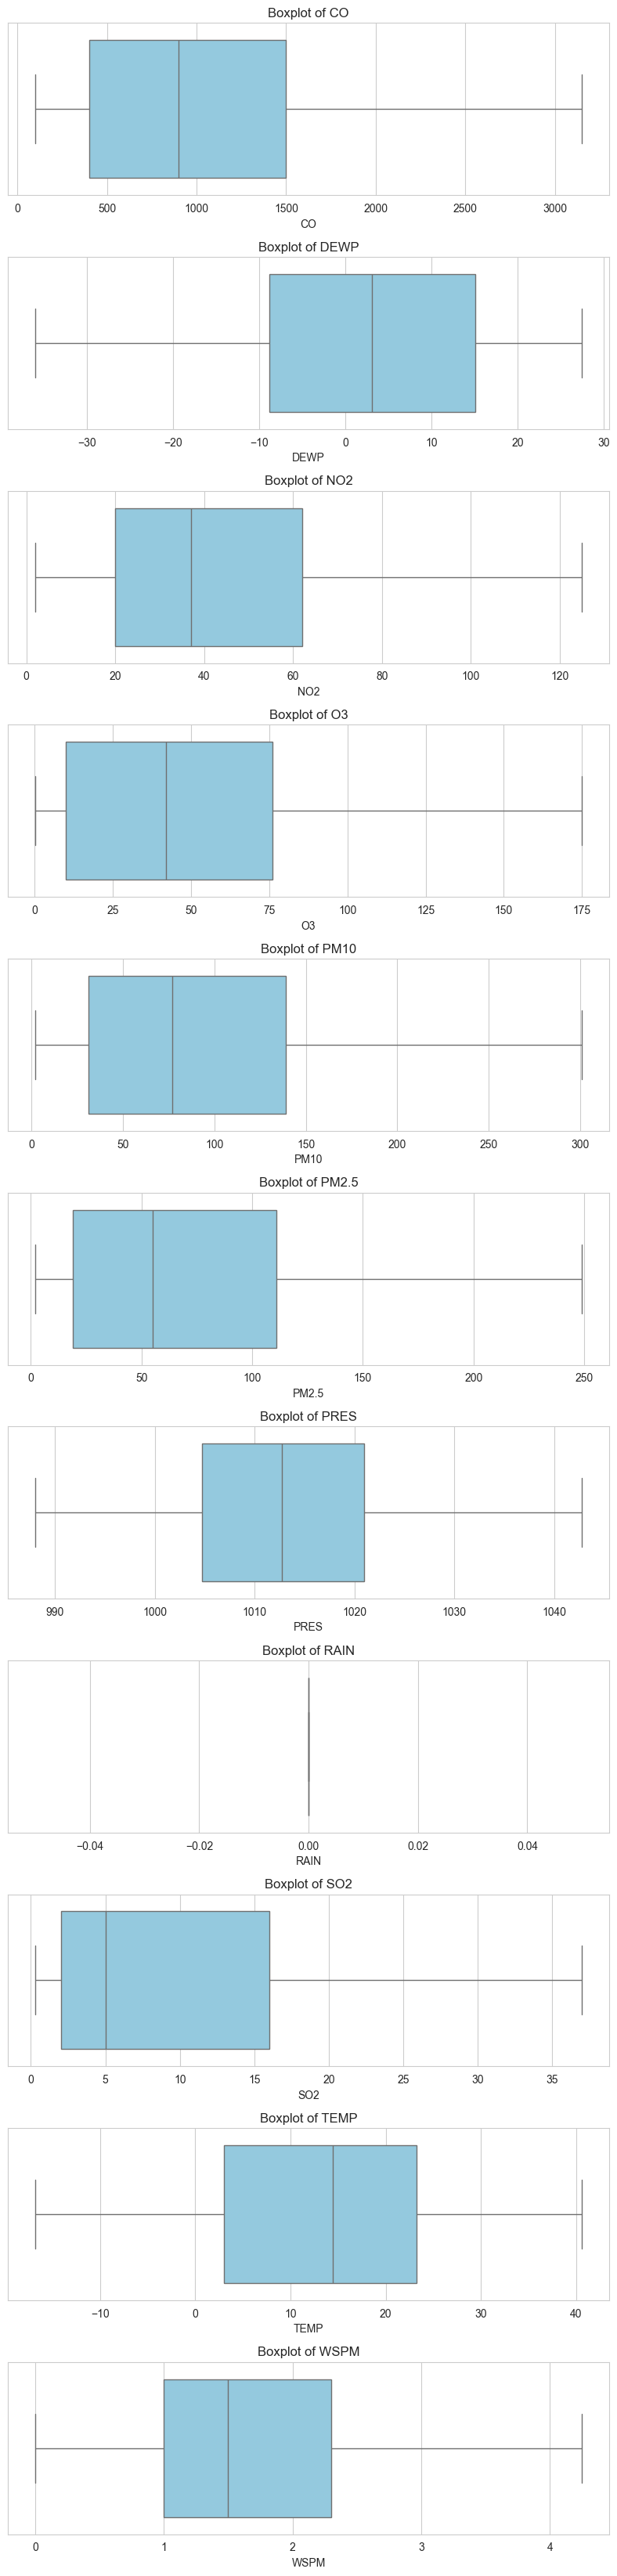

In [133]:
# cek kembali outlier

fig, axes = plt.subplots(num_plots, 1, figsize=(8, num_plots * 3))

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax, color="skyblue")
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [134]:
df.drop(["RAIN"], inplace=True, axis=1)

**Insight:**
- Mengatasi Missing Values dengan menggunakan metode interpolasi, median, dan modus. 
- Interpolasi untuk distribusi tidak normal, Median untuk distribusi data normal, dan  modus untuk data kategorik.
- Kolom Rain tidak berguna karena nilai keseluruhan nya adalah 0.
- Membersihkan outliers dengan menggunakan metode IQR
- Dataset telah bersih.

## Exploratory Data Analysis (EDA)

### Explore ...

In [135]:
df.head()

,No,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM,station
0,1,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,NW,4.25,Shunyi
1,2,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,NW,4.25,Shunyi
2,3,2013-03-01 02:00:00,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,NW,4.25,Shunyi
3,4,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,200.0,16.5,-2.1,1027.3,-23.3,NW,4.25,Shunyi
4,5,2013-03-01 04:00:00,12.0,12.0,3.0,6.0,200.0,11.0,-2.4,1027.7,-22.9,NW,4.25,Shunyi


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   datetime  35064 non-null  datetime64[ns]
 2   PM2.5     35064 non-null  float64       
 3   PM10      35064 non-null  float64       
 4   SO2       35064 non-null  float64       
 5   NO2       35064 non-null  float64       
 6   CO        35064 non-null  float64       
 7   O3        35064 non-null  float64       
 8   TEMP      35064 non-null  float64       
 9   PRES      35064 non-null  float64       
 10  DEWP      35064 non-null  float64       
 11  wd        35064 non-null  object        
 12  WSPM      35064 non-null  float64       
 13  station   35064 non-null  object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 3.7+ MB


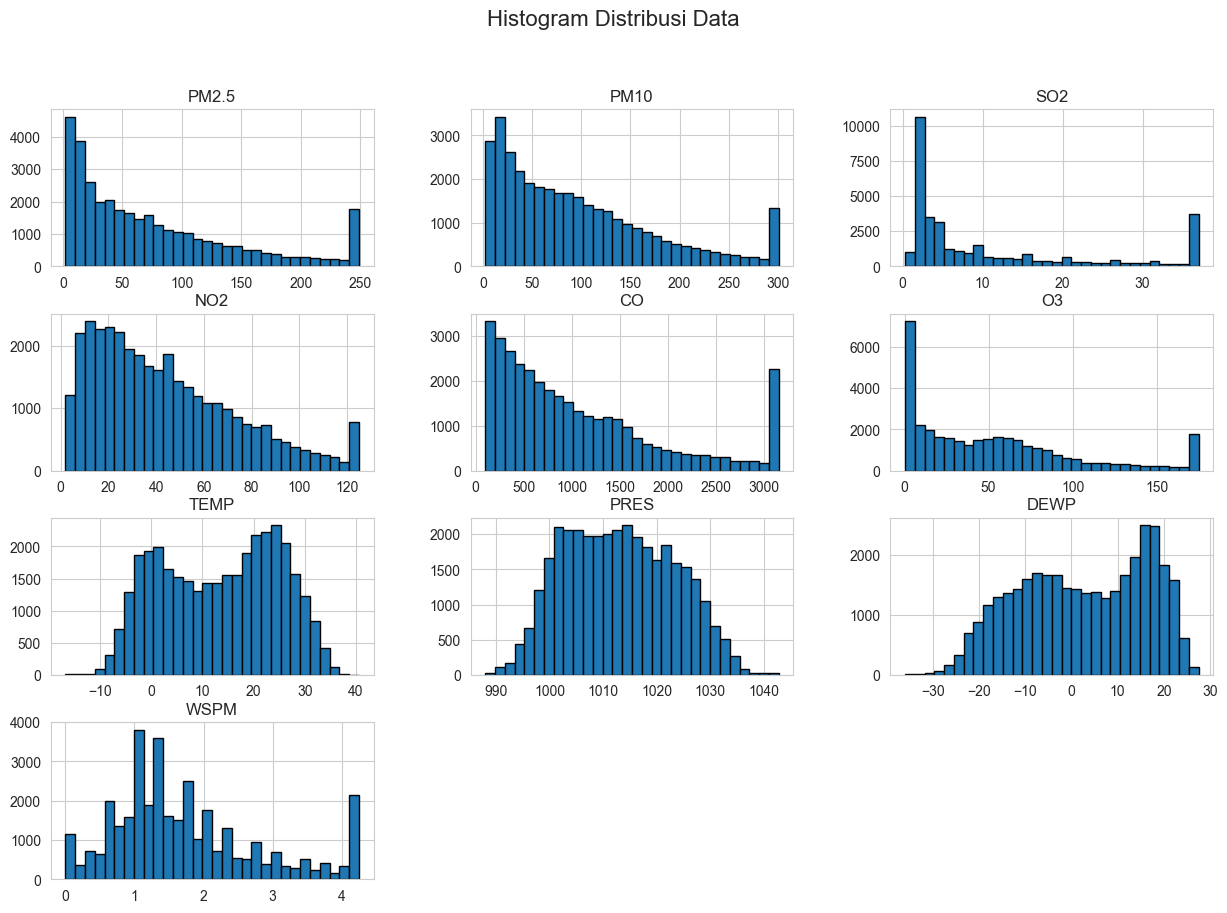

In [137]:
# set kolom numerik
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

# Plot histogram tiap2 kolom numerik
df[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histogram Distribusi Data", fontsize=16)
plt.show()

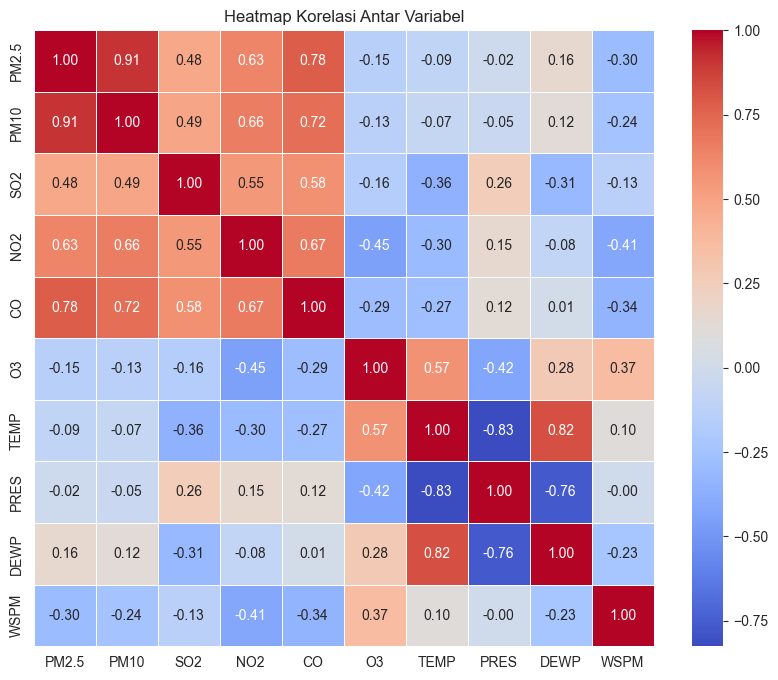

In [138]:
# correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Binning


C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_8076\3497125302.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM2.5_binned', data=df, palette='Blues')


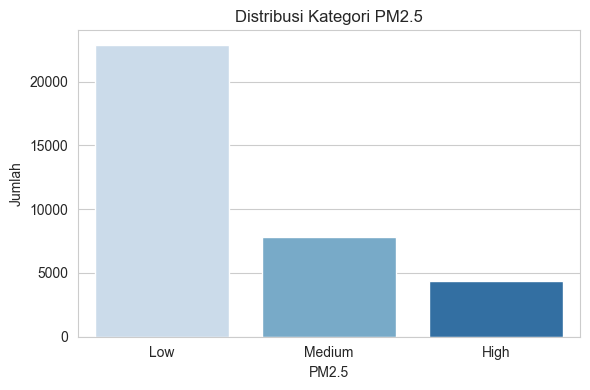

In [139]:
labels = ['Low', 'Medium', 'High']
df['PM2.5_binned'] = pd.cut(
    df['PM2.5'],
    bins=3,
    labels=labels,
    include_lowest=True
)

# Tampilkan distribusi dan data contoh
bin_distribution = df['PM2.5_binned'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.countplot(x='PM2.5_binned', data=df, palette='Blues')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

C:\Users\Randy Sam\AppData\Local\Temp\ipykernel_8076\3618514548.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarter_avg.index, y=quarter_avg.values, palette='Blues')


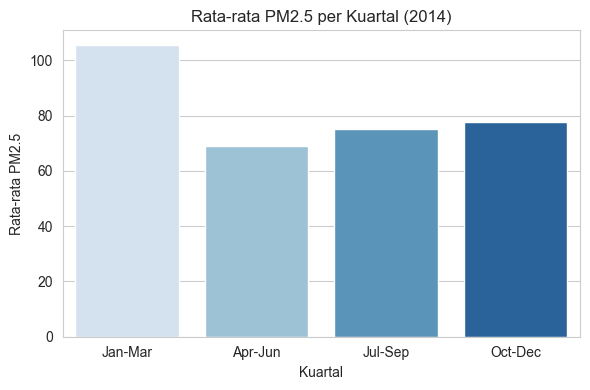

In [140]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

# Filter hanya tahun 2014
df_2014 = df[df['year'] == 2014].copy()

# Tambahkan kolom kuartal (berdasarkan bulan)
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Jan-Mar'
    elif month in [4, 5, 6]:
        return 'Apr-Jun'
    elif month in [7, 8, 9]:
        return 'Jul-Sep'
    elif month in [10, 11, 12]:
        return 'Oct-Dec'

df_2014['quarter'] = df_2014['month'].apply(get_quarter)

# Hitung rata-rata PM2.5 per kuartal
quarter_avg = df_2014.groupby('quarter')['PM2.5'].mean().reindex(['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'])

# Visualisasikan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=quarter_avg.index, y=quarter_avg.values, palette='Blues')
plt.title('Rata-rata PM2.5 per Kuartal (2014)')
plt.xlabel('Kuartal')
plt.ylabel('Rata-rata PM2.5')
plt.tight_layout()
plt.show()


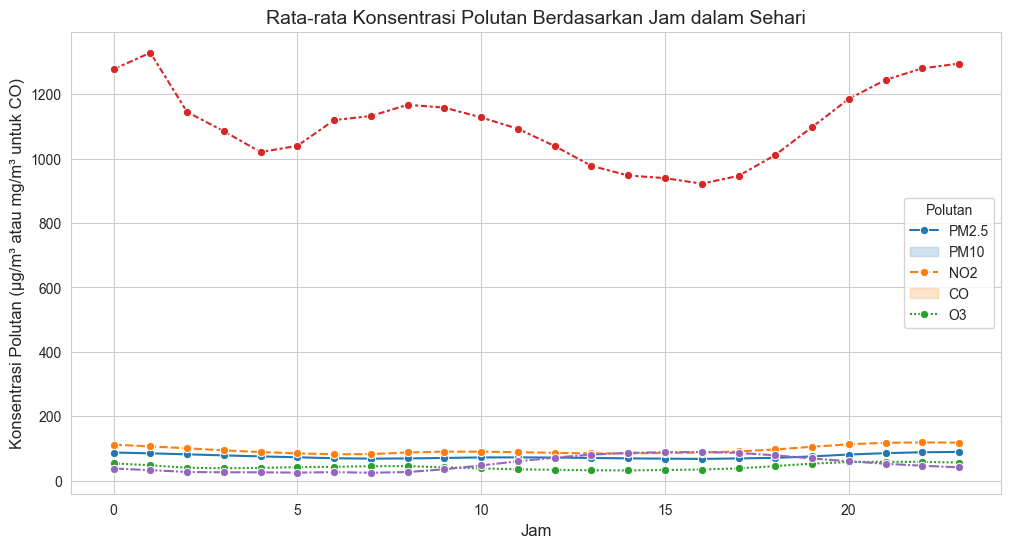

In [ ]:

# Gunakan data yang sudah dibersihkan
df['hour'] = df['datetime'].dt.hour

# Hitung rata-rata polusi berdasarkan jam dalam sehari
hourly_avg = df.groupby('hour')[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, marker="o")

plt.title("Rata-rata Konsentrasi Polutan Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Konsentrasi Polutan (µg/m³ atau mg/m³ untuk CO)", fontsize=12)
plt.legend(hourly_avg.columns, title="Polutan")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

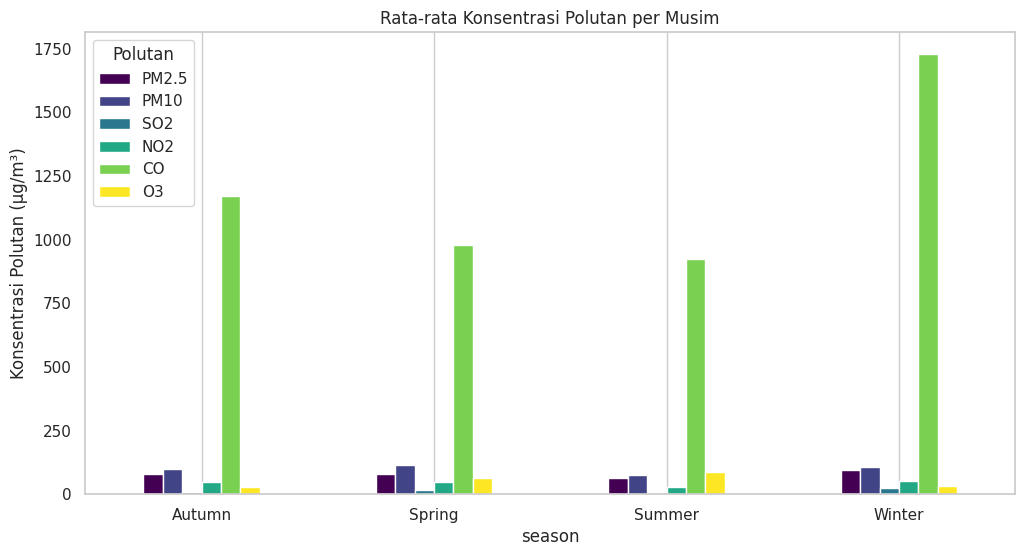

In [ ]:
# Define musim
df['season'] = df.index.month.map(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else 'Autumn'
)

# Compute rataan musim
seasonal_avg = df.groupby('season')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Plot perbandingan musiman
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', colormap='viridis', figsize=(12, 6))
plt.title("Rata-rata Konsentrasi Polutan per Musim")
plt.ylabel("Konsentrasi Polutan (µg/m³)")
plt.xticks(rotation=0)
plt.legend(title="Polutan")
plt.grid(axis='y')
plt.show()

**Insight:**
- Konsentrasi polutan seperti PM2.5 dan PM10 cenderung lebih tinggi selama musim dingin pada bulan Desember hingga Februari dan kuartal satu pada bulan Januari sampai Maret. Sebaliknya, musim panas dan musim gugur memiliki kualitas udara yang lebih baik, kemungkinan karena peningkatan curah hujan dan angin yang lebih kuat membantu menyebarkan polutan.
- Tidak ada tren penurunan polusi yang signifikan dari tahun ke tahun, menunjukkan bahwa upaya mitigasi mungkin masih perlu diperkuat.
- Konsentrasi polutan lebih tinggi pada pagi (06:00–10:00) dan malam (18:00–22:00), yang berkorelasi dengan jam sibuk lalu lintas dan aktivitas industri.
Pada siang hari, polutan cenderung menurun karena efek fotokimia (reaksi dengan sinar matahari yang mengurangi beberapa polutan seperti NO2) dan peningkatan kecepatan angin.
- PM2.5 dan PM10 memiliki korelasi sangat tinggi, menunjukkan bahwa kedua partikel ini berasal dari sumber yang sama (misalnya emisi kendaraan dan aktivitas industri).
CO dan NO2 juga berkorelasi positif, yang mengindikasikan bahwa sumber utama keduanya kemungkinan besar berasal dari kendaraan bermotor dan pembakaran bahan bakar fosil.
O3 (ozon) menunjukkan hubungan terbalik dengan polutan lain, karena cenderung meningkat pada siang hari saat sinar matahari membantu membentuk ozon dari prekursor seperti NO2.

## Visualization & Explanatory Analysis



- Dalam periode 2013 hingga 2017, bagaimana perkembangan tren PM2.5 di distrik Shunyi? Apakah terdapat pola musiman (seperti musim dingin atau musim panas) yang konsisten dalam tren peningkatan polusi?
- Sejauh mana parameter cuaca seperti suhu udara, tekanan atmosfer, dan kecepatan angin berpengaruh secara statistik terhadap tingkat konsentrasi PM2.5 di distrik Shunyi pada tahun 2013–2017?

### Pertanyaan 1:

 Dalam periode 2013 hingga 2017, bagaimana perkembangan tren PM2.5 di distrik Shunyi? Apakah terdapat pola musiman (seperti musim dingin atau musim panas) yang konsisten dalam tren peningkatan polusi?

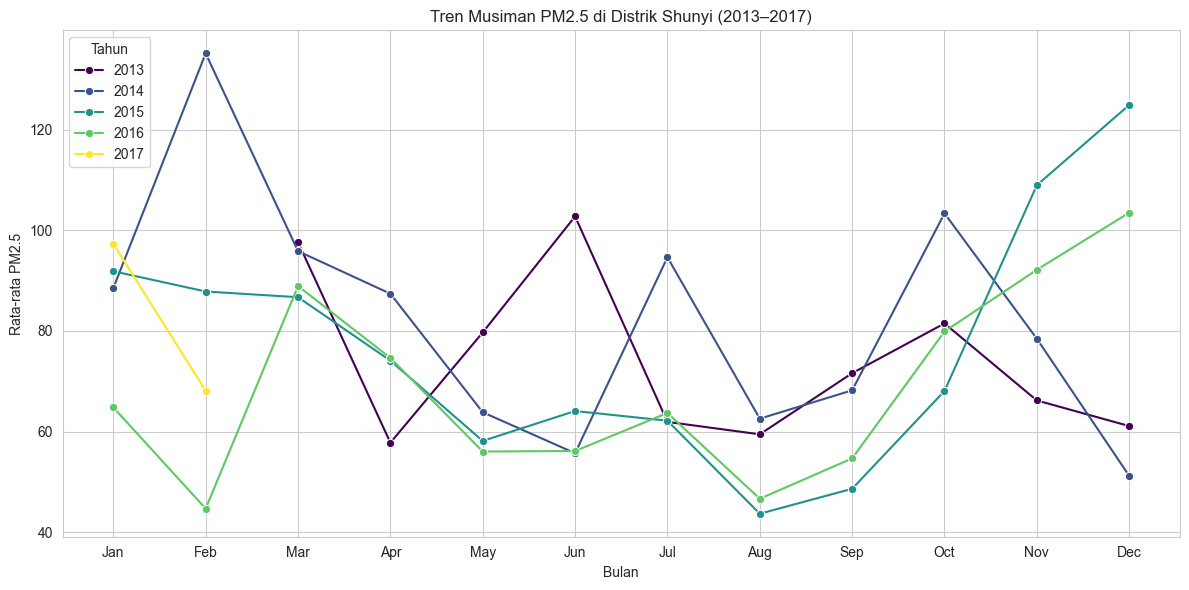

In [ ]:
# Hitung rata-rata PM2.5 per bulan untuk setiap tahun
monthly_trend = df.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

# Buat visualisasi garis tren musiman dari 2013–2017
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='PM2.5', hue='year', palette='viridis', marker='o')
plt.title('Tren Musiman PM2.5 di Distrik Shunyi (2013–2017)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Tahun')
plt.grid(True)
plt.tight_layout()
plt.show()


### Pertanyaan 2:
Sejauh mana korelasi parameter cuaca seperti suhu udara, tekanan atmosfer, dan kecepatan angin berpengaruh secara statistik terhadap tingkat konsentrasi PM2.5 di distrik Shunyi?

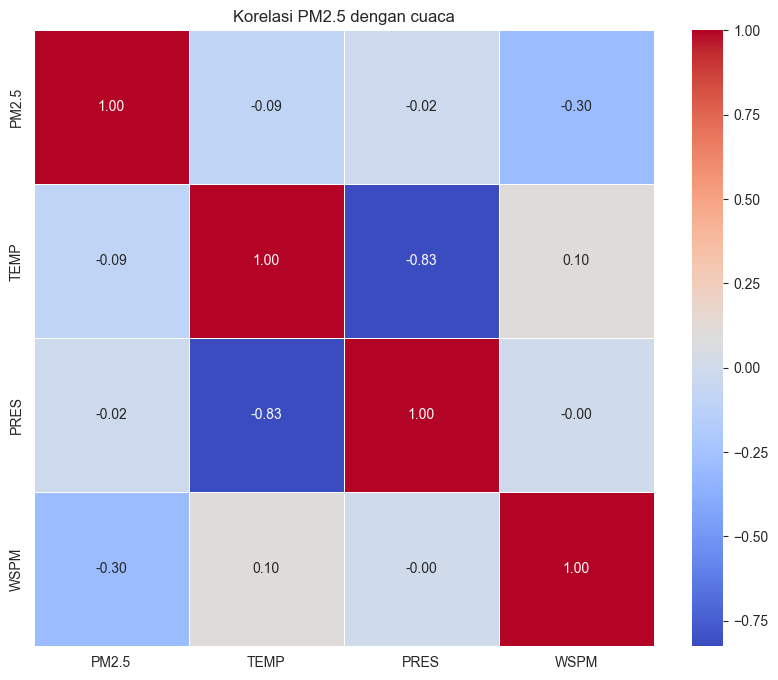

In [ ]:
correlation_matrix = df[["PM2.5", "TEMP", "PRES", "WSPM"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi PM2.5 dengan cuaca")
plt.show()

**Insight:**
- Berdasarkan analisis, periode dengan tingkat polusi udara tertinggi terjadi pada Februari 2014, dengan rata-rata PM2.5 sebesar 155.09 µg/m³. Secara umum, polusi udara cenderung lebih tinggi pada musim dingin (Desember–Februari). Hal ini kemungkinan disebabkan oleh peningkatan penggunaan pemanas berbahan bakar fosil serta fenomena inversi suhu, yang menjebak polutan di dekat permukaan tanah. Kondisi ini menyebabkan akumulasi polutan lebih tinggi dibandingkan musim lainnya. Oleh karena itu, kebijakan pengendalian polusi perlu difokuskan pada periode ini, seperti pembatasan emisi kendaraan dan industri selama musim dingin, promosi energi bersih untuk pemanas rumah tangga, serta peningkatan sistem peringatan dini dan tindakan darurat polusi. Dengan langkah-langkah ini, dampak buruk polusi udara selama periode kritis dapat diminimalkan
- Analisis hubungan antara parameter cuaca dan konsentrasi PM2.5 menunjukkan bahwa kecepatan angin (WSPM) memiliki korelasi negatif moderat (-0.30) dengan PM2.5, yang berarti semakin tinggi kecepatan angin, semakin rendah konsentrasi polusi. Ini menunjukkan bahwa kecepatan angin adalah faktor yang berpengaruh signifikan dalam penyebaran polutan dan dapat digunakan sebagai variabel utama dalam model prediksi kualitas udara. Sementara itu, suhu (TEMP) memiliki korelasi negatif lemah (-0.09) dengan PM2.5, yang mengindikasikan bahwa polusi cenderung lebih tinggi saat suhu lebih rendah, meskipun pengaruhnya tidak sebesar kecepatan angin. Di sisi lain, tekanan udara (PRES) hampir tidak memiliki hubungan signifikan (-0.02) dengan PM2.5, sehingga tidak perlu menjadi fokus utama dalam prediksi. Dengan demikian, model prediksi kualitas udara dapat menggunakan kecepatan angin dan suhu sebagai faktor utama untuk memperkirakan tingkat PM2.5 dan memberikan peringatan dini mengenai kondisi udara di wilayah Shunyi.

# Conclusion

**1. Conclusion pertanyaan 1:**

Selama periode 2013 hingga 2017, tingkat konsentrasi PM2.5 di distrik Shunyi menunjukkan pola musiman yang konsisten setiap tahunnya. Nilai PM2.5 cenderung meningkat signifikan selama musim dingin (Desember hingga Februari), dan menurun selama musim panas (Juni hingga Agustus). Hal ini kemungkinan disebabkan oleh peningkatan penggunaan bahan bakar untuk pemanas serta kondisi atmosfer yang kurang mendukung dispersi polutan saat musim dingin. Secara umum, tren tahunan menunjukkan kecenderungan penurunan tingkat polusi, terutama setelah tahun 2014 yang tercatat sebagai tahun dengan tingkat PM2.5 paling tinggi hampir di seluruh bulan. Tren ini dapat mencerminkan dampak kebijakan pengendalian polusi udara atau perbaikan dalam infrastruktur lingkungan.

**2. Conclusion pertanyaan2:**

Hasil analisis statistik terhadap tiga parameter cuaca — suhu udara (TEMP), tekanan atmosfer (PRES), dan kecepatan angin (WSPM) — menunjukkan bahwa:

- Kecepatan angin memiliki pengaruh paling signifikan, dengan korelasi negatif sedang terhadap PM2.5. Ini berarti semakin kencang angin, semakin rendah tingkat polusi udara karena partikel polutan tersebar lebih luas.
- Tekanan udara menunjukkan pengaruh negatif yang sangat lemah namun signifikan secara statistik, menandakan bahwa tekanan tinggi sedikit berkaitan dengan penurunan polusi.
- Suhu udara tidak memiliki korelasi yang signifikan terhadap PM2.5, sehingga tidak menjadi faktor utama dalam dinamika polusi udara di wilayah ini.

Beberapa rekomendasi yang dapat saya berikan antara lain:
- Para pemangku kebijakan akan lebih baik untuk berfokus pada musim dingin sebagai periode kritis dalam pengendalian polusi.
- Mendorong rekayasa lingkungan berbasis aliran udara (misalnya, penataan kota yang mendukung sirkulasi angin) dapat menjadi strategi efektif menurunkan PM2.5.
- Perlu dilakukan pemantauan dan intervensi khusus saat tekanan atmosfer rendah dan angin lemah, karena kondisi ini memperburuk kualitas udara.